In [1]:
# Import our libraries we are going to use for our data analysis.
#import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Training and Testing Sets
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("high_diamond_ranked_10min.csv")
df2=df.copy()
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
#Inspecting the Null values
df.isnull().sum(axis=0)

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol


 mu = 14.41 and sigma = 2453.23



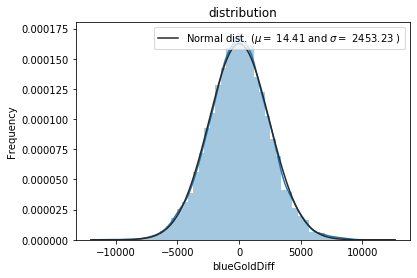

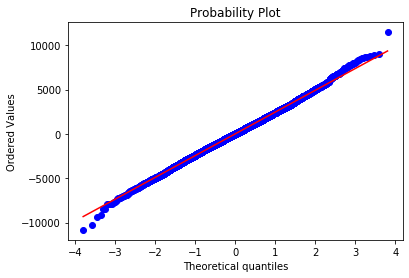

In [5]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df["blueGoldDiff"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df["blueGoldDiff"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df["blueGoldDiff"], plot=plt)
plt.show()


 mu = -33.62 and sigma = 1920.27



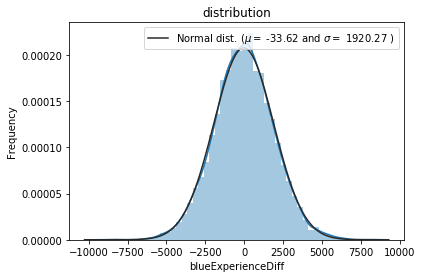

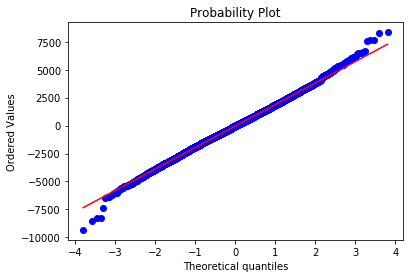

In [6]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df["blueExperienceDiff"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df["blueExperienceDiff"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df["blueExperienceDiff"], plot=plt)
plt.show()

In [7]:
df.shape

(9879, 40)

0    4949
1    4930
Name: blueWins, dtype: int64


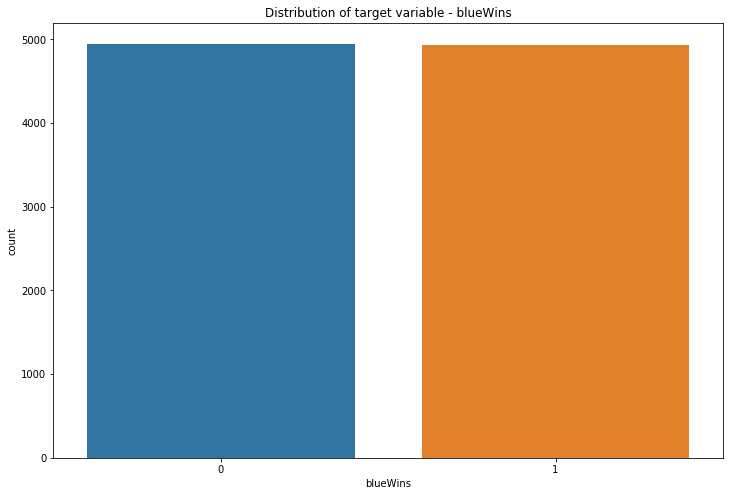

In [8]:
plt.figure(figsize=(12,8))
plt.title('Distribution of target variable - blueWins')
plt.ylabel('Amount of wins')
sns.countplot(df['blueWins'])
print(df['blueWins'].value_counts())

In [9]:
cols = ['gameId', 'redFirstBlood','blueKills','blueDeaths', 'redKills','redDeaths','blueGoldDiff', 'blueExperienceDiff','redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin',
        'blueCSPerMin', 'blueGoldPerMin','blueEliteMonsters' ,'redEliteMonsters','blueAvgLevel','redAvgLevel']
df = df.drop(cols, axis = 1)

In [10]:

Label = df['blueWins']
features = df.drop('blueWins', axis=1)

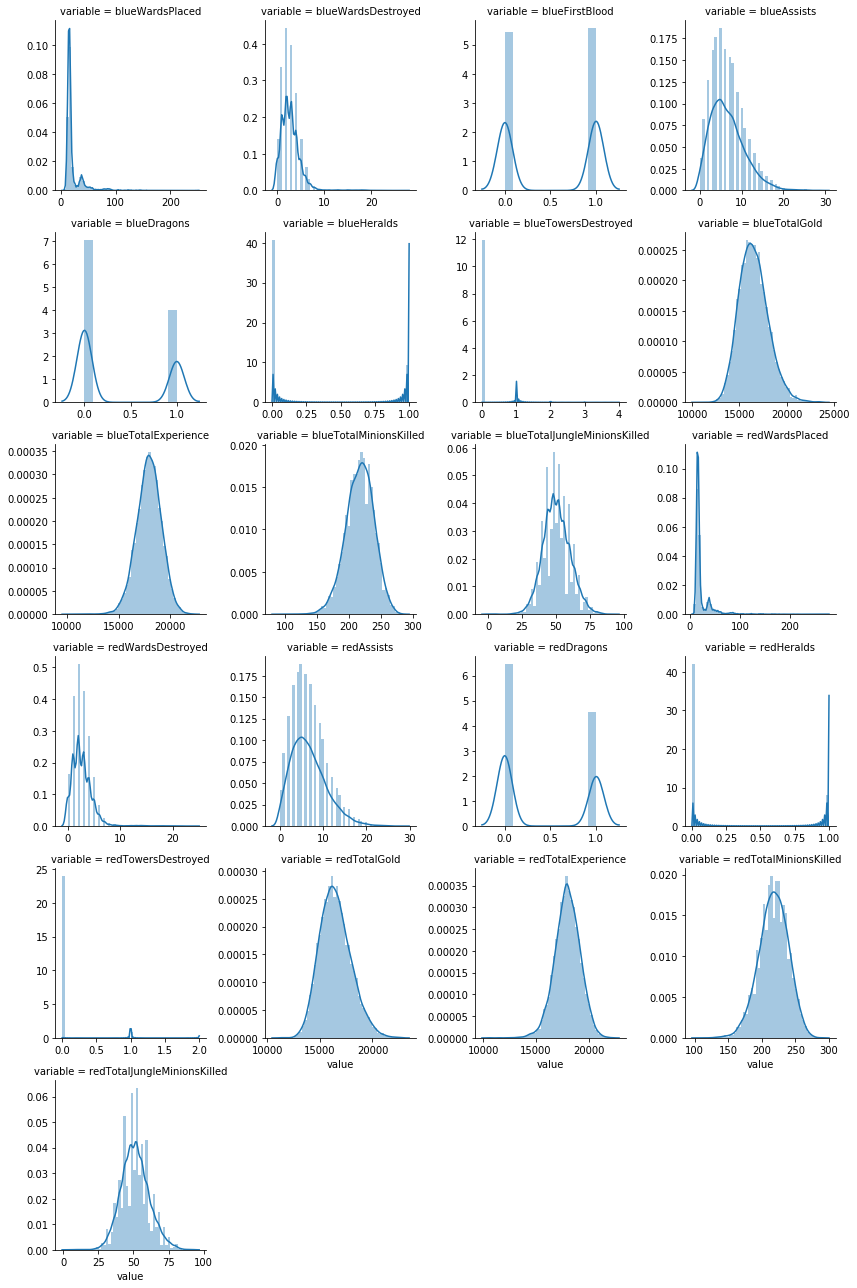

In [11]:
# quantitative data
f = pd.melt(features)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

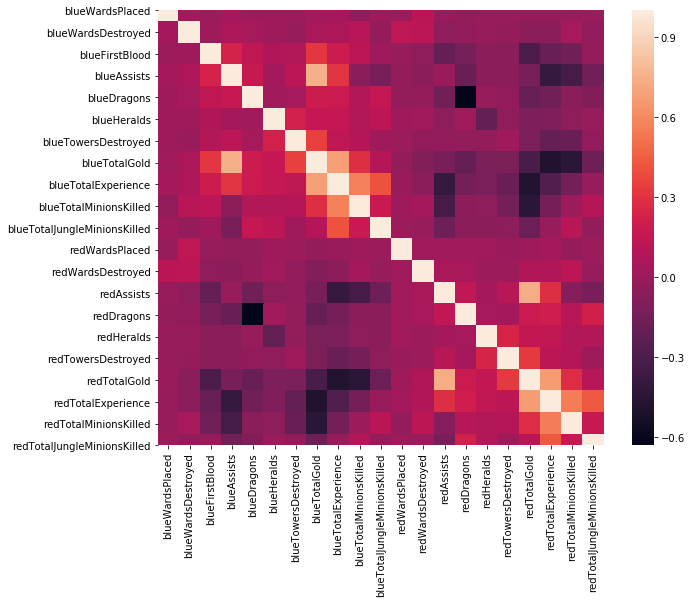

In [12]:
plt.figure(figsize=(10, 8)) 
plt.figure(1)
corr = features.corr()
sns.heatmap(corr)

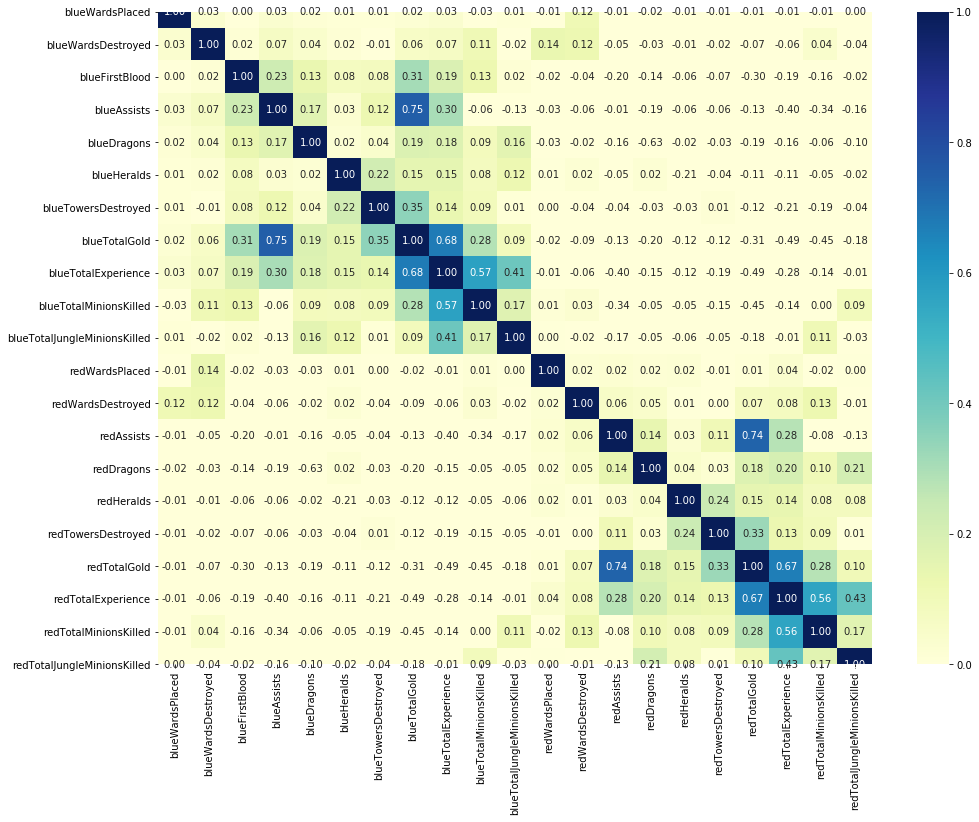

In [13]:
# We can see that a lot of the features are highly correlated, let's get the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(features.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

C:\Users\dojin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


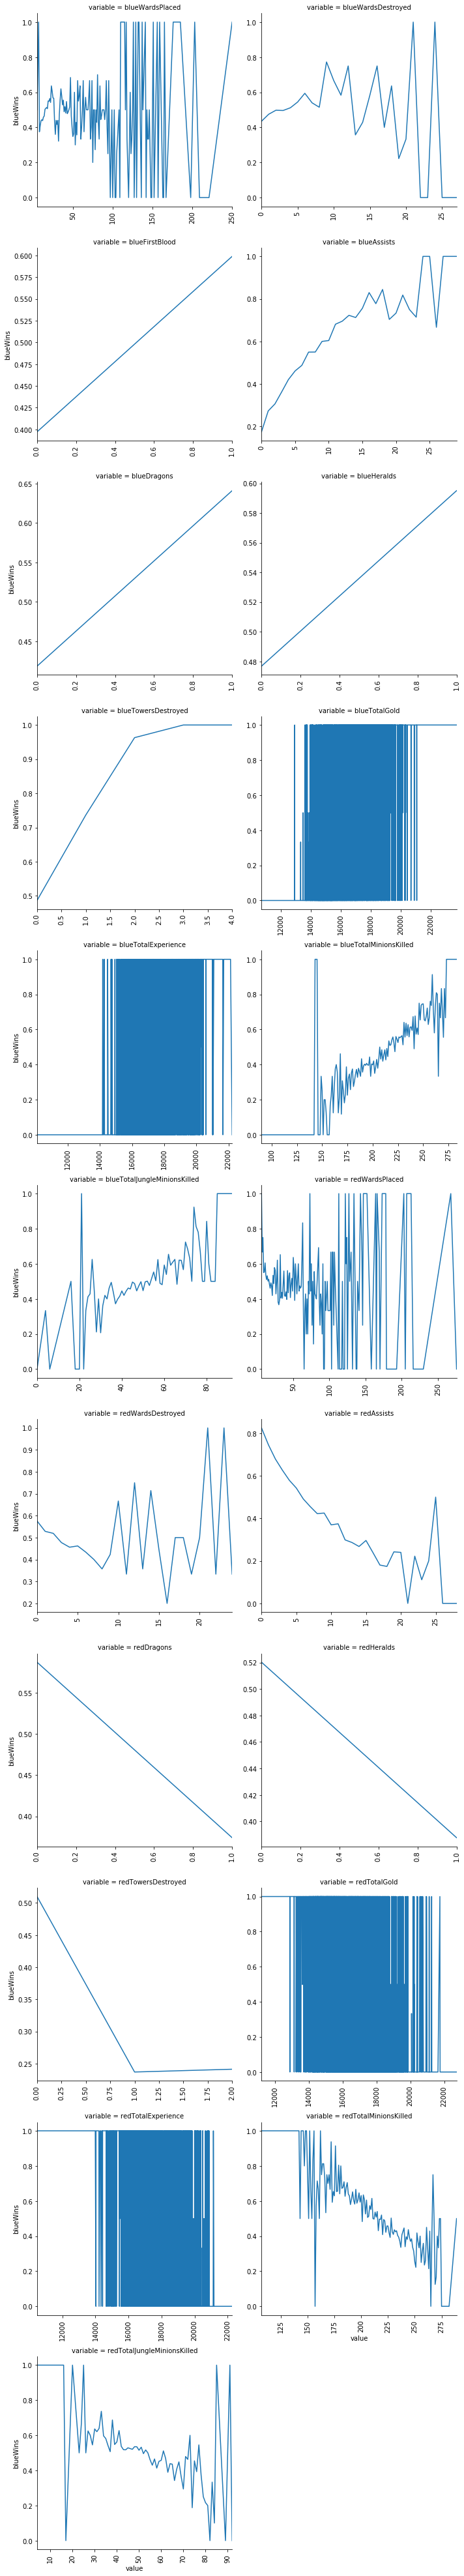

In [14]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df, id_vars=['blueWins'], value_vars=features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "blueWins")

### Feature engineering

#### DiffVariable = blueVariable - redVariable

In [15]:
df = df2
columns_to_drop = ['gameId']
df = df.drop(columns_to_drop, axis=1)


In [16]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [17]:
y = df['blueWins']
X = df.drop('blueWins', axis=1)

In [18]:
diff_variables = ['WardsPlaced', 'WardsDestroyed', 'Kills', 'Deaths', 'Assists', 'Dragons', 'Heralds', 'TowersDestroyed', 'AvgLevel','TotalMinionsKilled','TotalJungleMinionsKilled']
variables_to_drop_red = ['GoldDiff', 'ExperienceDiff']
X_with_fe = pd.DataFrame()
X_with_fe['FirstBlood'] = X['blueFirstBlood']
for var in diff_variables:
    X_with_fe[f'{var}Diff'] = X[f'blue{var}'] - X[f'red{var}']

for var in variables_to_drop_red:
    X_with_fe[var] = X[f'blue{var}']
X_with_fe.head()

,FirstBlood,WardsPlacedDiff,WardsDestroyedDiff,KillsDiff,DeathsDiff,AssistsDiff,DragonsDiff,HeraldsDiff,TowersDestroyedDiff,AvgLevelDiff,TotalMinionsKilledDiff,TotalJungleMinionsKilledDiff,GoldDiff,ExperienceDiff
0,1,13,-4,3,-3,3,0,0,0,-0.2,-2,-19,643,-8
1,0,0,0,0,0,3,-1,-1,-1,-0.2,-66,-9,-2908,-1173
2,0,0,-3,-4,4,-10,1,0,0,-0.4,-17,18,-1172,-1033
3,0,28,-1,-1,1,-5,0,1,0,0.0,-34,8,-1321,-7
4,0,58,2,0,0,-1,-1,0,0,0.0,-15,-10,-1004,230


In [19]:
X_with_fe['killAssiDiff'] = X_with_fe['KillsDiff'] + X_with_fe['AssistsDiff']
dropcol = ['DeathsDiff','GoldDiff','ExperienceDiff','KillsDiff','AssistsDiff']
X_with_fe = X_with_fe.drop(dropcol, axis=1)



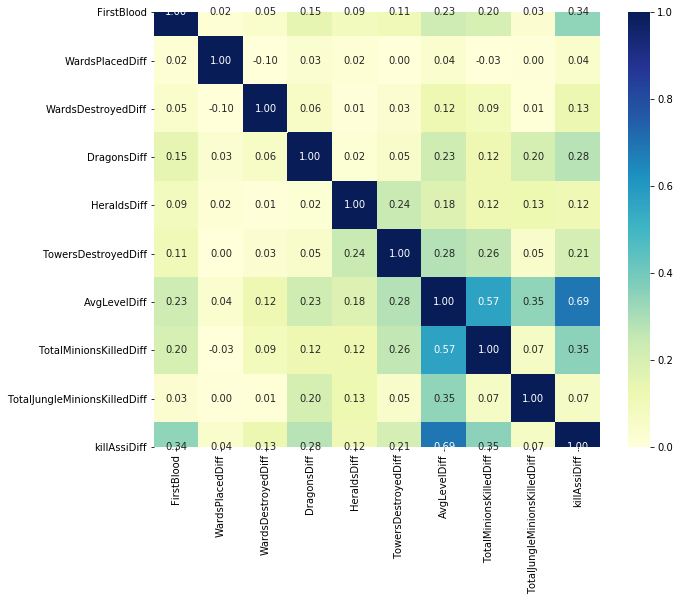

In [20]:
# We can see that a lot of the features are highly correlated, let's get the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_with_fe.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [21]:
# Before Feature engineering
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)  

In [22]:
# After Feature engineering
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_with_fe, y, random_state=1)

In [23]:
# After scaling
### 데이터 전처리 - 데이터 표준화 작업 (scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

sc = StandardScaler()
transformer = sc.fit(X_train_fe)

#위에서 training set으로 fit 시킨 평균,분산 값을 이용하여 각 세트의 독립변수(X)들을 변환시킨다. 
X_train_std=transformer.transform(X_train_fe)

X_test_std=transformer.transform(X_test_fe)

In [24]:
dataset_1 = (X_train, X_test, y_train, y_test, 'dataset_1') #Tuple of the unmodified dataset
dataset_2 = (X_train_fe, X_test_fe, y_train_fe, y_test_fe, 'dataset_2') #Tuple of the dataset with feature engineering
dataset_3 = (X_train_std, X_test_std, y_train_fe, y_test_fe, 'dataset_3') #Tuple of the dataset with feature engineering and scaling

In [25]:
def test_classifier(model, dataset):
    model.fit(dataset[0], dataset[2])
    predictions = model.predict(dataset[1])
    accuracy = accuracy_score(dataset[3], predictions)
    return f'{round(accuracy,4)*100}%'

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from xgboost import plot_tree as plot_xgboost

model_dict ={'RandomForest':RandomForestClassifier(random_state=1),'Support Vector Classification': SVC(random_state=1),'Gaussian Naive Bayes':GaussianNB(), 'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1), 'XGBoost': XGBClassifier()}
for model in model_dict:
    print(f'model:{model} - Before FE accuracy: {test_classifier(model_dict[model], dataset_1)}')
    print(f'model:{model} - After FE accuracy: {test_classifier(model_dict[model], dataset_2)}')
    print(f'model:{model} - After sc accuracy: {test_classifier(model_dict[model], dataset_3)}')

C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


model:RandomForest - Before FE accuracy: 69.64%
model:RandomForest - After FE accuracy: 68.83%
model:RandomForest - After sc accuracy: 68.87%


C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


model:Support Vector Classification - Before FE accuracy: 50.160000000000004%


C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


model:Support Vector Classification - After FE accuracy: 59.550000000000004%
model:Support Vector Classification - After sc accuracy: 72.31%
model:Gaussian Naive Bayes - Before FE accuracy: 74.33%
model:Gaussian Naive Bayes - After FE accuracy: 72.87%
model:Gaussian Naive Bayes - After sc accuracy: 72.87%
model:Gradient Boosting Classifier - Before FE accuracy: 74.45%
model:Gradient Boosting Classifier - After FE accuracy: 72.63%
model:Gradient Boosting Classifier - After sc accuracy: 72.63%
model:XGBoost - Before FE accuracy: 74.00999999999999%
model:XGBoost - After FE accuracy: 72.63%
model:XGBoost - After sc accuracy: 72.63%


### RandomForest

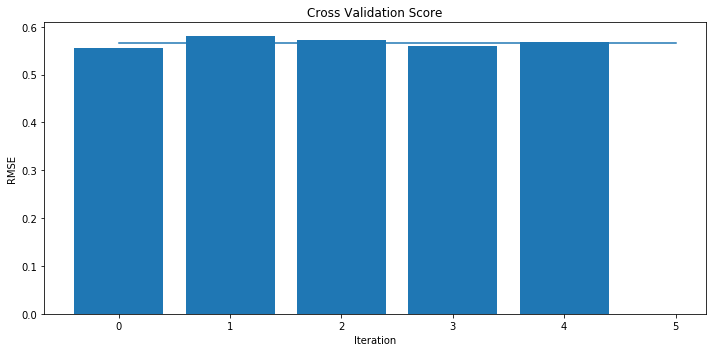

In [27]:
# k-fold 로 Cross Validation 실행. 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score

scorer = make_scorer(mean_squared_error, False)

clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
cv_score = np.sqrt(-cross_val_score(estimator=clf, X=X_train_std, y=y_train_fe, cv=5, scoring = scorer))

plt.figure(figsize=(10,5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()


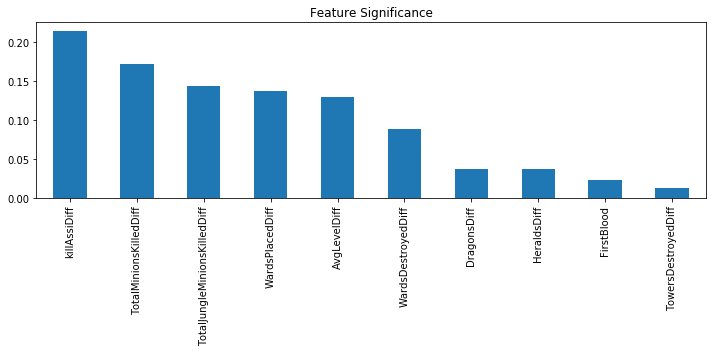

In [28]:
# Fit model with training data
clf.fit(X_train_std, y_train_fe)

# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(clf.feature_importances_, index = X_train_fe.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [29]:
print("train set Accuracy:",clf.score(X_train_std,y_train_fe))
print("test set Accuracy:",clf.score(X_test_std,y_test_fe))

train set Accuracy: 0.983803482251316
test set Accuracy: 0.68582995951417


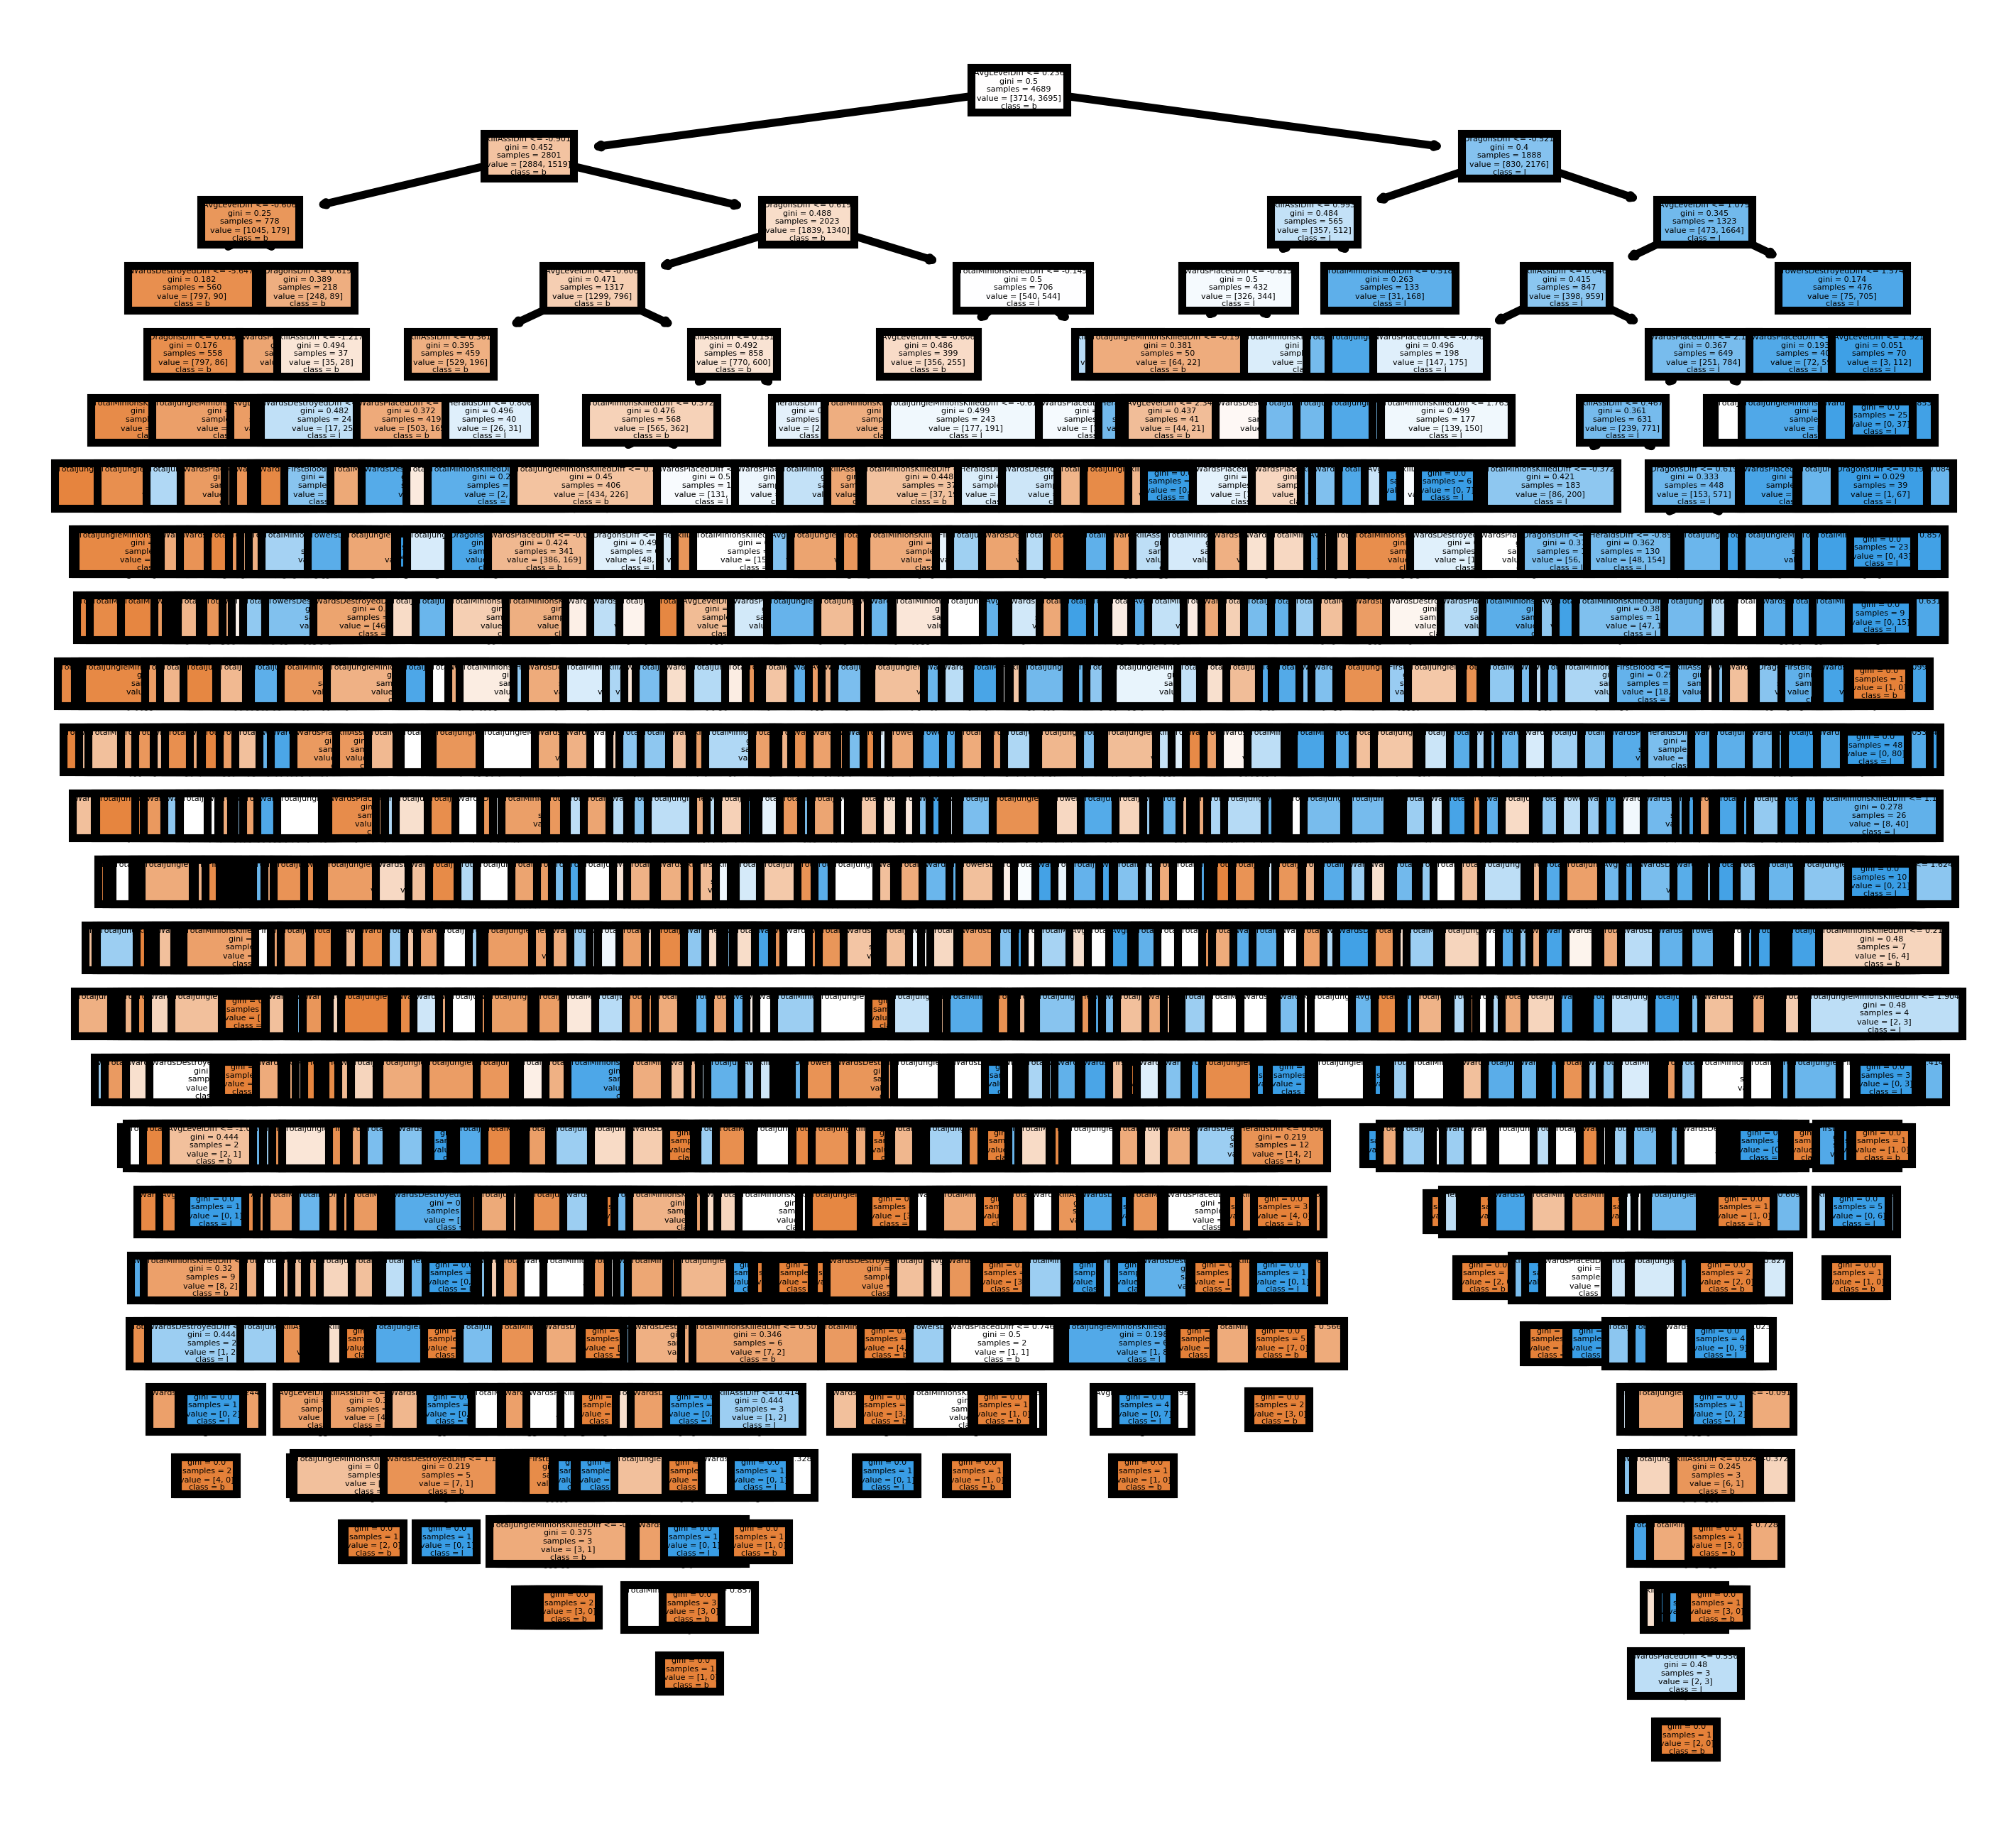

In [30]:
from sklearn import tree

fn=X_train_fe.columns
cn=y_train.name
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('clf_individualtree.png')

### GradientBoosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train_std, y_train_fe)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train_std, y_train_fe)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test_std, y_test_fe)))

훈련 세트 정확도: 0.740
테스트 세트 정확도: 0.726


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42,learning_rate=0.2)
gbrt.fit(X_train_std, y_train_fe)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train_std, y_train_fe)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test_std, y_test_fe)))

훈련 세트 정확도: 0.748
테스트 세트 정확도: 0.727


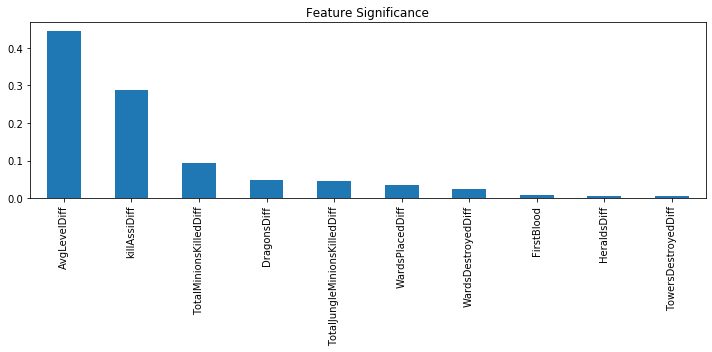

In [33]:
# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(gbrt.feature_importances_, index = X_train_fe.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

Variable: AvgLevelDiff         Importance: 0.45
Variable: killAssiDiff         Importance: 0.29
Variable: TotalMinionsKilledDiff Importance: 0.09
Variable: DragonsDiff          Importance: 0.05
Variable: TotalJungleMinionsKilledDiff Importance: 0.05
Variable: WardsPlacedDiff      Importance: 0.03
Variable: WardsDestroyedDiff   Importance: 0.02
Variable: FirstBlood           Importance: 0.01
Variable: HeraldsDiff          Importance: 0.01
Variable: TowersDestroyedDiff  Importance: 0.0


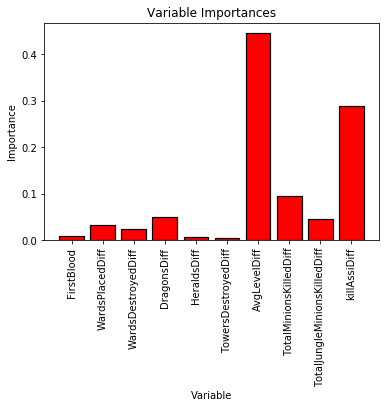

In [34]:
# Get numerical feature importances

feature_list = list(X_train_fe.columns)
importances = list(gbrt.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


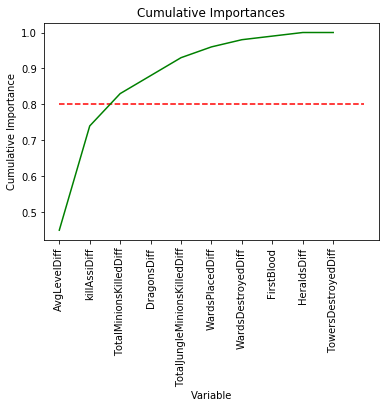

In [35]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 80% of importance retained
plt.hlines(y = 0.80, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

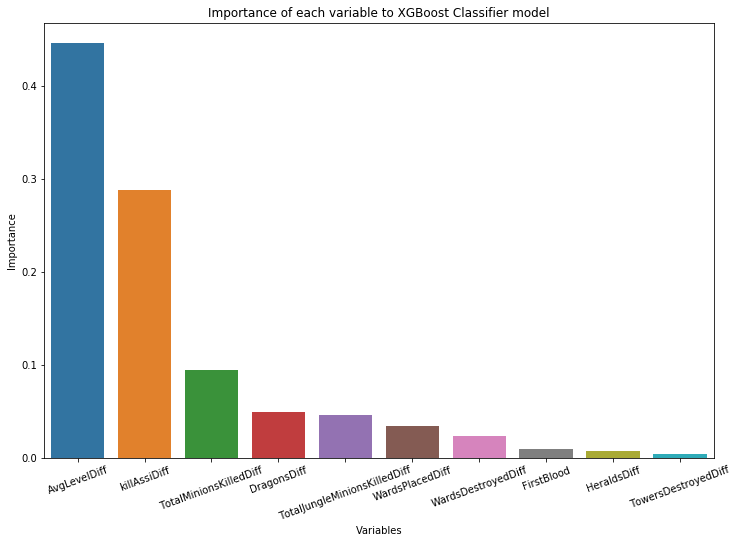

In [82]:
importance_df = pd.DataFrame({'Variables':dataset_2[0].columns,
              'Importance':gbrt.feature_importances_}).sort_values('Importance', ascending=False)
plt.figure(figsize=(12,8))
plt.xticks(rotation=20)
plt.title('Importance of each variable to XGBoost Classifier model')
_ = sns.barplot(x='Variables', y='Importance',data=importance_df )

### XGBClassifier 

In [51]:
def xboost_func(model, dataset):

    model.fit(dataset[0], dataset[2], 
             early_stopping_rounds=50, 
             eval_set=[(dataset[1], dataset[3])], 
             verbose=False)
    predictions = model.predict(dataset[1])
    accuracy = accuracy_score(dataset[3], predictions)
    return f'{round(accuracy,4)*100}%'


XGBoost = XGBClassifier(n_estimators=1000, learning_rate=0.06, max_depth= 3, subsample= 0.9, colsample_bytree= 1, gamma= 1)
for df in (dataset_1, dataset_2, dataset_3):  
    test_model = xboost_func(XGBoost,df)
    print(f'XGBoost accuracy on {df[4]}: {test_model}')

XGBoost accuracy on dataset_1: 74.74%
XGBoost accuracy on dataset_2: 73.08%
XGBoost accuracy on dataset_3: 73.08%


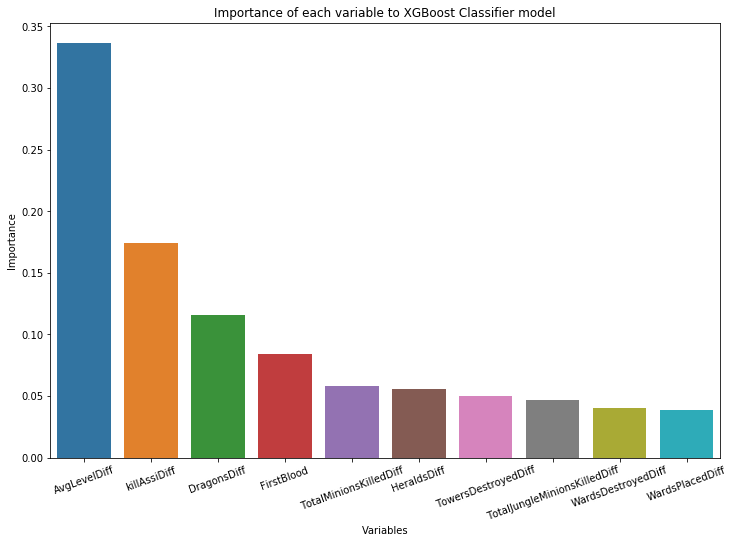

In [80]:
importance_df = pd.DataFrame({'Variables':dataset_2[0].columns,
              'Importance':XGBoost.feature_importances_}).sort_values('Importance', ascending=False)
plt.figure(figsize=(12,8))
plt.xticks(rotation=20)
plt.title('Importance of each variable to XGBoost Classifier model')
_ = sns.barplot(x='Variables', y='Importance',data=importance_df )